In [1]:
from __future__ import print_function

import glob
import wget
import os

from gempy.adlibrary import dataselect

from recipe_system import cal_service
from recipe_system.reduction.coreReduce import Reduce
from gempy.utils import logutils

from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib.colors import LogNorm

import astrodata
%matplotlib inline

In [2]:
logutils.config(file_name='gmos_data_reduction.log')
!pwd

/home/anaennis/Documents/Work/2023/ngc3640


In [3]:
caldb = cal_service.CalibrationService()
caldb.config()
caldb.init()

cal_service.set_calservice()

CalibrationService is configured as standalone.
The configured local database will be used.


In [4]:
all_files = glob.glob('raw/*.fits')
all_files.sort()
all_files

['raw/N20151228S0159.fits',
 'raw/N20151228S0160.fits',
 'raw/N20151228S0161.fits',
 'raw/N20151228S0162.fits',
 'raw/N20151228S0163.fits',
 'raw/N20151229S0578.fits',
 'raw/N20151229S0579.fits',
 'raw/N20151229S0580.fits',
 'raw/N20151229S0581.fits',
 'raw/N20151229S0582.fits',
 'raw/N20151230S0445.fits',
 'raw/N20151230S0446.fits',
 'raw/N20151230S0447.fits',
 'raw/N20151230S0448.fits',
 'raw/N20151230S0449.fits',
 'raw/N20151231S0334.fits',
 'raw/N20151231S0335.fits',
 'raw/N20151231S0336.fits',
 'raw/N20151231S0337.fits',
 'raw/N20151231S0338.fits',
 'raw/N20160101S0438.fits',
 'raw/N20160101S0439.fits',
 'raw/N20160101S0440.fits',
 'raw/N20160101S0441.fits',
 'raw/N20160101S0442.fits',
 'raw/N20160102S0477.fits',
 'raw/N20160102S0478.fits',
 'raw/N20160102S0479.fits',
 'raw/N20160102S0480.fits',
 'raw/N20160102S0481.fits',
 'raw/N20160103S0503.fits',
 'raw/N20160103S0504.fits',
 'raw/N20160103S0505.fits',
 'raw/N20160103S0506.fits',
 'raw/N20160103S0507.fits',
 'raw/N20160104S0374

In [5]:
extra_files = glob.glob('fringe/*.fits')
extra_files.sort()

In [6]:
list_of_fringes = dataselect.select_data(
    extra_files,
    [],
    [])

In [7]:
list_of_biases = dataselect.select_data(
    all_files,
    ['BIAS'],
    []
)

In [8]:
flats_g = dataselect.select_data(
     all_files,
     ['FLAT'],
     [],
     dataselect.expr_parser('filter_name=="g"')
)

In [9]:
flats_r = dataselect.select_data(
     all_files,
     ['FLAT'],
     [],
     dataselect.expr_parser('filter_name=="r"')
)

In [10]:
flats_i = dataselect.select_data(
     all_files,
     ['FLAT'],
     [],
     dataselect.expr_parser('filter_name=="i"')
)

In [11]:
sci_g = dataselect.select_data(
    all_files,
    [],
    ['CAL'],
    dataselect.expr_parser('(observation_class=="science" and filter_name=="g")')
)

In [12]:
sci_r = dataselect.select_data(
    all_files,
    [],
    ['CAL'],
    dataselect.expr_parser('(observation_class=="science" and filter_name=="r")')
)

In [13]:
sci_i = dataselect.select_data(
    all_files,
    [],
    ['CAL'],
    dataselect.expr_parser('(observation_class=="science" and filter_name=="i")')
)

In [14]:
reduce_bias = Reduce()
reduce_bias.files.extend(list_of_biases)
reduce_bias.runr()

caldb.add_cal(reduce_bias.output_filenames[0])

All submitted files appear valid:
raw/N20151228S0159.fits ... raw/N20160214S0575.fits, 140 files submitted.
RECIPE: makeProcessedBias
   PRIMITIVE: prepare
   ------------------
      PRIMITIVE: validateData
      -----------------------
      .
      PRIMITIVE: standardizeStructure
      -------------------------------
      .
      PRIMITIVE: standardizeHeaders
      -----------------------------
         PRIMITIVE: standardizeObservatoryHeaders
         ----------------------------------------
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
  

         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
        

         Updating keywords that are specific to GMOS
         Updating keywords that are specific to GMOS
         Updating keywords that are specific to GMOS
         Updating keywords that are specific to GMOS
         Updating keywords that are specific to GMOS
         Updating keywords that are specific to GMOS
         Updating keywords that are specific to GMOS
         Updating keywords that are specific to GMOS
         .
      .
      PRIMITIVE: standardizeWCS
      -------------------------
      .
   .
   PRIMITIVE: addDQ
   ----------------
   .
   PRIMITIVE: maskFaultyAmp
   ------------------------
   .
   PRIMITIVE: addVAR
   -----------------
   Adding the read noise component of the variance
   .
   PRIMITIVE: overscanCorrect
   --------------------------
      PRIMITIVE: subtractOverscan
      ---------------------------
         PRIMITIVE: subtractOverscan
         ---------------------------
         .
      .
      PRIMITIVE: trimOverscan
      -------------------

In [15]:
reduce_flats = Reduce()
reduce_flats.files.extend(flats_g)
reduce_flats.runr()

caldb.add_cal(reduce_flats.output_filenames[0])

All submitted files appear valid:
raw/N20160202S0458.fits ... raw/N20160202S0477.fits, 20 files submitted.
RECIPE: makeProcessedFlat
   PRIMITIVE: prepare
   ------------------
      PRIMITIVE: validateData
      -----------------------
      .
      PRIMITIVE: standardizeStructure
      -------------------------------
      .
      PRIMITIVE: standardizeHeaders
      -----------------------------
         PRIMITIVE: standardizeObservatoryHeaders
         ----------------------------------------
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
   

      Cached calibration calibrations/processed_bias/N20151228S0159_bias.fits matched.
      LOCAL CALIBRATION SEARCH:
      Cached calibration calibrations/processed_bias/N20151228S0159_bias.fits matched.
      LOCAL CALIBRATION SEARCH:
      Cached calibration calibrations/processed_bias/N20151228S0159_bias.fits matched.
      LOCAL CALIBRATION SEARCH:
      Cached calibration calibrations/processed_bias/N20151228S0159_bias.fits matched.
      LOCAL CALIBRATION SEARCH:
      Cached calibration calibrations/processed_bias/N20151228S0159_bias.fits matched.
      LOCAL CALIBRATION SEARCH:
      Cached calibration calibrations/processed_bias/N20151228S0159_bias.fits matched.
      LOCAL CALIBRATION SEARCH:
      Cached calibration calibrations/processed_bias/N20151228S0159_bias.fits matched.
      .
   Using calibrations/processed_bias/N20151228S0159_bias.fits for N20160202S0458_overscanCorrected.fits
   Using calibrations/processed_bias/N20151228S0159_bias.fits for N20160202S0459_oversc

     gain for EXTVER 2 = 2.31
     gain for EXTVER 3 = 2.27
     gain for EXTVER 4 = 2.21
     gain for EXTVER 5 = 2.17
     gain for EXTVER 6 = 2.33
   Converting N20160202S0469_biasCorrected.fits from ADU to electrons by multiplying by the gain
     gain for EXTVER 1 = 2.31
     gain for EXTVER 2 = 2.31
     gain for EXTVER 3 = 2.27
     gain for EXTVER 4 = 2.21
     gain for EXTVER 5 = 2.17
     gain for EXTVER 6 = 2.33
   Converting N20160202S0470_biasCorrected.fits from ADU to electrons by multiplying by the gain
     gain for EXTVER 1 = 2.31
     gain for EXTVER 2 = 2.31
     gain for EXTVER 3 = 2.27
     gain for EXTVER 4 = 2.21
     gain for EXTVER 5 = 2.17
     gain for EXTVER 6 = 2.33
   Converting N20160202S0471_biasCorrected.fits from ADU to electrons by multiplying by the gain
     gain for EXTVER 1 = 2.31
     gain for EXTVER 2 = 2.31
     gain for EXTVER 3 = 2.27
     gain for EXTVER 4 = 2.21
     gain for EXTVER 5 = 2.17
     gain for EXTVER 6 = 2.33
   Converting N2016

In [16]:
reduce_flats = Reduce()
reduce_flats.files.extend(flats_r)
reduce_flats.runr()

caldb.add_cal(reduce_flats.output_filenames[0])

All submitted files appear valid:
raw/N20160201S0380.fits ... raw/N20160203S0495.fits, 20 files submitted.
RECIPE: makeProcessedFlat
   PRIMITIVE: prepare
   ------------------
      PRIMITIVE: validateData
      -----------------------
      .
      PRIMITIVE: standardizeStructure
      -------------------------------
      .
      PRIMITIVE: standardizeHeaders
      -----------------------------
         PRIMITIVE: standardizeObservatoryHeaders
         ----------------------------------------
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
   

      Cached calibration calibrations/processed_bias/N20151228S0159_bias.fits matched.
      LOCAL CALIBRATION SEARCH:
      Cached calibration calibrations/processed_bias/N20151228S0159_bias.fits matched.
      LOCAL CALIBRATION SEARCH:
      Cached calibration calibrations/processed_bias/N20151228S0159_bias.fits matched.
      LOCAL CALIBRATION SEARCH:
      Cached calibration calibrations/processed_bias/N20151228S0159_bias.fits matched.
      LOCAL CALIBRATION SEARCH:
      Cached calibration calibrations/processed_bias/N20151228S0159_bias.fits matched.
      LOCAL CALIBRATION SEARCH:
      Cached calibration calibrations/processed_bias/N20151228S0159_bias.fits matched.
      .
   Using calibrations/processed_bias/N20151228S0159_bias.fits for N20160201S0380_overscanCorrected.fits
   Using calibrations/processed_bias/N20151228S0159_bias.fits for N20160201S0381_overscanCorrected.fits
   Using calibrations/processed_bias/N20151228S0159_bias.fits for N20160201S0382_overscanCorrected.fit

     gain for EXTVER 6 = 2.33
   Converting N20160203S0487_biasCorrected.fits from ADU to electrons by multiplying by the gain
     gain for EXTVER 1 = 2.31
     gain for EXTVER 2 = 2.31
     gain for EXTVER 3 = 2.27
     gain for EXTVER 4 = 2.21
     gain for EXTVER 5 = 2.17
     gain for EXTVER 6 = 2.33
   Converting N20160203S0488_biasCorrected.fits from ADU to electrons by multiplying by the gain
     gain for EXTVER 1 = 2.31
     gain for EXTVER 2 = 2.31
     gain for EXTVER 3 = 2.27
     gain for EXTVER 4 = 2.21
     gain for EXTVER 5 = 2.17
     gain for EXTVER 6 = 2.33
   Converting N20160203S0489_biasCorrected.fits from ADU to electrons by multiplying by the gain
     gain for EXTVER 1 = 2.31
     gain for EXTVER 2 = 2.31
     gain for EXTVER 3 = 2.27
     gain for EXTVER 4 = 2.21
     gain for EXTVER 5 = 2.17
     gain for EXTVER 6 = 2.33
   Converting N20160203S0490_biasCorrected.fits from ADU to electrons by multiplying by the gain
     gain for EXTVER 1 = 2.31
     gain fo

In [18]:
reduce_flats = Reduce()
reduce_flats.files.extend(flats_i)

reduce_flats.runr()

caldb.add_cal(reduce_flats.output_filenames[0])

All submitted files appear valid:
raw/N20160206S0202.fits ... raw/N20160209S0222.fits, 20 files submitted.
RECIPE: makeProcessedFlat
   PRIMITIVE: prepare
   ------------------
      PRIMITIVE: validateData
      -----------------------
      .
      PRIMITIVE: standardizeStructure
      -------------------------------
      .
      PRIMITIVE: standardizeHeaders
      -----------------------------
         PRIMITIVE: standardizeObservatoryHeaders
         ----------------------------------------
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
   

      Cached calibration calibrations/processed_bias/N20151228S0159_bias.fits matched.
      LOCAL CALIBRATION SEARCH:
      Cached calibration calibrations/processed_bias/N20151228S0159_bias.fits matched.
      LOCAL CALIBRATION SEARCH:
      Cached calibration calibrations/processed_bias/N20151228S0159_bias.fits matched.
      LOCAL CALIBRATION SEARCH:
      Cached calibration calibrations/processed_bias/N20151228S0159_bias.fits matched.
      LOCAL CALIBRATION SEARCH:
      Cached calibration calibrations/processed_bias/N20151228S0159_bias.fits matched.
      LOCAL CALIBRATION SEARCH:
      Cached calibration calibrations/processed_bias/N20151228S0159_bias.fits matched.
      .
   Using calibrations/processed_bias/N20151228S0159_bias.fits for N20160206S0202_overscanCorrected.fits
   Using calibrations/processed_bias/N20151228S0159_bias.fits for N20160206S0203_overscanCorrected.fits
   Using calibrations/processed_bias/N20151228S0159_bias.fits for N20160206S0204_overscanCorrected.fit

     gain for EXTVER 6 = 2.33
   Converting N20160209S0214_biasCorrected.fits from ADU to electrons by multiplying by the gain
     gain for EXTVER 1 = 2.31
     gain for EXTVER 2 = 2.31
     gain for EXTVER 3 = 2.27
     gain for EXTVER 4 = 2.21
     gain for EXTVER 5 = 2.17
     gain for EXTVER 6 = 2.33
   Converting N20160209S0215_biasCorrected.fits from ADU to electrons by multiplying by the gain
     gain for EXTVER 1 = 2.31
     gain for EXTVER 2 = 2.31
     gain for EXTVER 3 = 2.27
     gain for EXTVER 4 = 2.21
     gain for EXTVER 5 = 2.17
     gain for EXTVER 6 = 2.33
   Converting N20160209S0216_biasCorrected.fits from ADU to electrons by multiplying by the gain
     gain for EXTVER 1 = 2.31
     gain for EXTVER 2 = 2.31
     gain for EXTVER 3 = 2.27
     gain for EXTVER 4 = 2.21
     gain for EXTVER 5 = 2.17
     gain for EXTVER 6 = 2.33
   Converting N20160209S0217_biasCorrected.fits from ADU to electrons by multiplying by the gain
     gain for EXTVER 1 = 2.31
     gain fo

In [63]:
reduce_science_r = Reduce()
reduce_science_r.files.extend(sci_r)
reduce_science_r.runr()

All submitted files appear valid:
raw/N20160210S0166.fits ... raw/N20160210S0187.fits, 10 files submitted.
RECIPE: reduce
   PRIMITIVE: prepare
   ------------------
      PRIMITIVE: validateData
      -----------------------
      .
      PRIMITIVE: standardizeStructure
      -------------------------------
      .
      PRIMITIVE: standardizeHeaders
      -----------------------------
         PRIMITIVE: standardizeObservatoryHeaders
         ----------------------------------------
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updat

     gain for EXTVER 1 = 2.31
     gain for EXTVER 2 = 2.31
     gain for EXTVER 3 = 2.27
     gain for EXTVER 4 = 2.21
     gain for EXTVER 5 = 2.17
     gain for EXTVER 6 = 2.33
   Converting N20160210S0169_biasCorrected.fits from ADU to electrons by multiplying by the gain
     gain for EXTVER 1 = 2.31
     gain for EXTVER 2 = 2.31
     gain for EXTVER 3 = 2.27
     gain for EXTVER 4 = 2.21
     gain for EXTVER 5 = 2.17
     gain for EXTVER 6 = 2.33
   Converting N20160210S0178_biasCorrected.fits from ADU to electrons by multiplying by the gain
     gain for EXTVER 1 = 2.31
     gain for EXTVER 2 = 2.31
     gain for EXTVER 3 = 2.27
     gain for EXTVER 4 = 2.21
     gain for EXTVER 5 = 2.17
     gain for EXTVER 6 = 2.33
   Converting N20160210S0179_biasCorrected.fits from ADU to electrons by multiplying by the gain
     gain for EXTVER 1 = 2.31
     gain for EXTVER 2 = 2.31
     gain for EXTVER 3 = 2.27
     gain for EXTVER 4 = 2.21
     gain for EXTVER 5 = 2.17
     gain for EXTVE

      WARNING - 
      WARNING - END CALIBRATION SERVICE REPORT
      WARNING - 
      LOCAL CALIBRATION SEARCH:
      WARNING - START CALIBRATION SERVICE REPORT
      WARNING - 
      WARNING - 	Could not find a proper calibration in the local database
      WARNING - 	No processed_fringe calibration file found for N20160210S0169_flatCorrected.fits
      WARNING - 
      WARNING - END CALIBRATION SERVICE REPORT
      WARNING - 
      LOCAL CALIBRATION SEARCH:
      WARNING - START CALIBRATION SERVICE REPORT
      WARNING - 
      WARNING - 	Could not find a proper calibration in the local database
      WARNING - 	No processed_fringe calibration file found for N20160210S0178_flatCorrected.fits
      WARNING - 
      WARNING - END CALIBRATION SERVICE REPORT
      WARNING - 
      LOCAL CALIBRATION SEARCH:
      WARNING - START CALIBRATION SERVICE REPORT
      WARNING - 
      WARNING - 	Could not find a proper calibration in the local database
      WARNING - 	No processed_fringe calib

   Coarse model in 0.09 seconds
   offset: 0.6970362239297501
   offset: 0.6970362239297501
   
   Final model in 0.43 seconds
   offset: 0.2623467514496557
   offset: 2.4805665645988135
   
   Cross-correlating sources in N20160210S0166_sourcesDetected.fits, N20160210S0187_sourcesDetected.fits
   Coarse model in 0.08 seconds
   offset: 0.6970362239297501
   offset: 0.6970362239297501
   
   Final model in 0.43 seconds
   offset: 0.061685466667690945
   offset: 2.7464812873758544
   
   .
   PRIMITIVE: resampleToCommonFrame
   --------------------------------
   Output image will have shape (3213, 4630)
   Resampling N20160210S0166_wcsCorrected.fits
   Array maps to [69:3179,2292:4596]
   Resampling N20160210S0167_wcsCorrected.fits
   Array maps to [104:3213,2327:4630]
   Resampling N20160210S0168_wcsCorrected.fits
   Array maps to [35:3144,2327:4630]
   Resampling N20160210S0169_wcsCorrected.fits
   Array maps to [1:3110,2292:4595]
   Resampling N20160210S0178_wcsCorrected.fits
   Arr

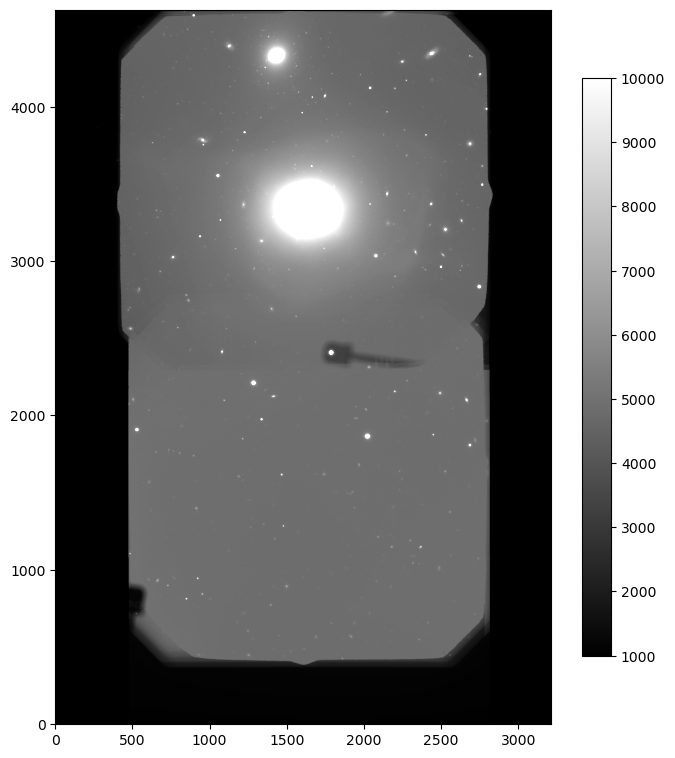

In [64]:
data = fits.open(reduce_science_r.output_filenames[0])
hdu = data[1].data

fig,ax = plt.subplots(figsize=(8,15))

plt.imshow(hdu, cmap='gray',origin='lower',vmax=10000,vmin=1000)
plt.colorbar(shrink=0.5)

In [65]:
reduce_science_g = Reduce()
reduce_science_g.files.extend(sci_g)
reduce_science_g.runr()

All submitted files appear valid:
raw/N20160210S0162.fits ... raw/N20160210S0177.fits, 8 files submitted.
RECIPE: reduce
   PRIMITIVE: prepare
   ------------------
      PRIMITIVE: validateData
      -----------------------
      .
      PRIMITIVE: standardizeStructure
      -------------------------------
      .
      PRIMITIVE: standardizeHeaders
      -----------------------------
         PRIMITIVE: standardizeObservatoryHeaders
         ----------------------------------------
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         .
    

     gain for EXTVER 1 = 2.31
     gain for EXTVER 2 = 2.31
     gain for EXTVER 3 = 2.27
     gain for EXTVER 4 = 2.21
     gain for EXTVER 5 = 2.17
     gain for EXTVER 6 = 2.33
   Converting N20160210S0177_biasCorrected.fits from ADU to electrons by multiplying by the gain
     gain for EXTVER 1 = 2.31
     gain for EXTVER 2 = 2.31
     gain for EXTVER 3 = 2.27
     gain for EXTVER 4 = 2.21
     gain for EXTVER 5 = 2.17
     gain for EXTVER 6 = 2.33
   .
   PRIMITIVE: addVAR
   -----------------
   Adding the Poisson noise component of the variance
   .
   PRIMITIVE: getProcessedFlat
   ---------------------------
      PRIMITIVE: getCalibration
      -------------------------
      Received calibration request for N20160210S0162_varAdded.fits
      Received calibration request for N20160210S0163_varAdded.fits
      Received calibration request for N20160210S0164_varAdded.fits
      Received calibration request for N20160210S0165_varAdded.fits
      Received calibration request for 

   No fringe correction necessary for N20160210S0163_flatCorrected.fits with filter g
   No fringe correction necessary for N20160210S0164_flatCorrected.fits with filter g
   No fringe correction necessary for N20160210S0165_flatCorrected.fits with filter g
   No fringe correction necessary for N20160210S0174_flatCorrected.fits with filter g
   No fringe correction necessary for N20160210S0175_flatCorrected.fits with filter g
   No fringe correction necessary for N20160210S0176_flatCorrected.fits with filter g
   No fringe correction necessary for N20160210S0177_flatCorrected.fits with filter g
   No input images require a fringe correction.
   .
   PRIMITIVE: mosaicDetectors
   --------------------------
   Array maps to [1:1024,1:2303]
   Array maps to [1045:2068,1:2304]
   Array maps to [2089:3111,2:2305]
   Array maps to [1:1024,1:2303]
   Array maps to [1045:2068,1:2304]
   Array maps to [2089:3111,2:2305]
   Array maps to [1:1024,1:2303]
   Array maps to [1045:2068,1:2304]
   Arr

   Combining images. Applying offsets.
   N20160210S0162_exposureTimeScaled.fits       0.000
   N20160210S0163_exposureTimeScaled.fits      75.080
   N20160210S0164_exposureTimeScaled.fits     181.792
   N20160210S0165_exposureTimeScaled.fits     248.192
   N20160210S0174_exposureTimeScaled.fits     797.499
   N20160210S0175_exposureTimeScaled.fits     799.895
   N20160210S0176_exposureTimeScaled.fits     793.936
   N20160210S0177_exposureTimeScaled.fits     764.102
   
   .
   PRIMITIVE: storeProcessedScience
   --------------------------------
   .
	Wrote N20160210S0162_image.fits in output directory

reduce completed successfully.


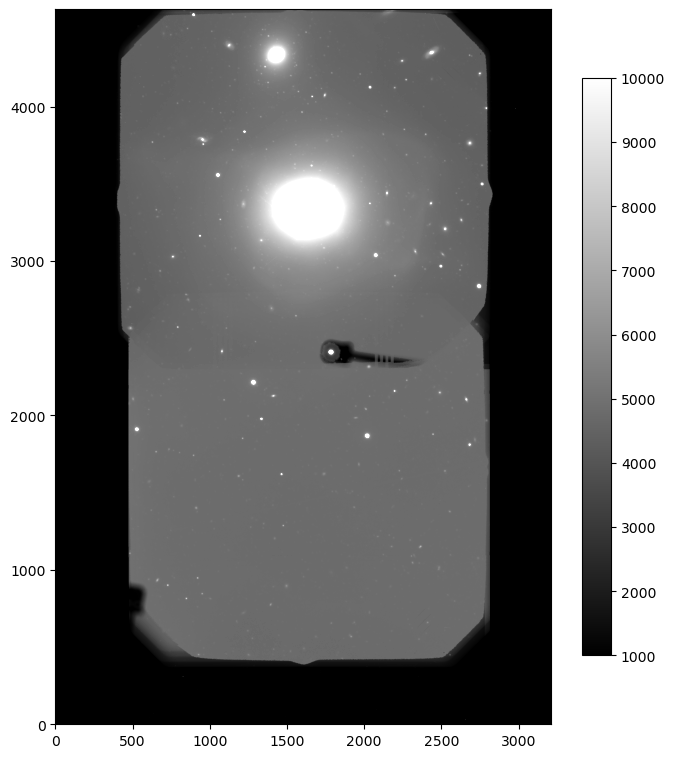

In [66]:
data = fits.open(reduce_science_g.output_filenames[0])
hdu = data[1].data

fig,ax = plt.subplots(figsize=(8,15))

plt.imshow(hdu, cmap='gray',origin='lower',vmax=10000,vmin=1000)
plt.colorbar(shrink=0.5)

In [67]:
caldb.add_cal('rgN20091209S0171_FRINGE_observatoryHeadersStandardized.fits')

In [68]:
reduce_science_i = Reduce()
reduce_science_i.uparms = [('fringe','rgN20091209S0171_FRINGE_observatoryHeadersStandardized.fits')]
reduce_science_i.files.extend(sci_i)
reduce_science_i.runr()

All submitted files appear valid:
raw/N20160210S0170.fits ... raw/N20160210S0185.fits, 8 files submitted.
RECIPE: reduce
   PRIMITIVE: prepare
   ------------------
      PRIMITIVE: validateData
      -----------------------
      .
      PRIMITIVE: standardizeStructure
      -------------------------------
      .
      PRIMITIVE: standardizeHeaders
      -----------------------------
         PRIMITIVE: standardizeObservatoryHeaders
         ----------------------------------------
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         .
    

     gain for EXTVER 1 = 2.31
     gain for EXTVER 2 = 2.31
     gain for EXTVER 3 = 2.27
     gain for EXTVER 4 = 2.21
     gain for EXTVER 5 = 2.17
     gain for EXTVER 6 = 2.33
   Converting N20160210S0185_biasCorrected.fits from ADU to electrons by multiplying by the gain
     gain for EXTVER 1 = 2.31
     gain for EXTVER 2 = 2.31
     gain for EXTVER 3 = 2.27
     gain for EXTVER 4 = 2.21
     gain for EXTVER 5 = 2.17
     gain for EXTVER 6 = 2.33
   .
   PRIMITIVE: addVAR
   -----------------
   Adding the Poisson noise component of the variance
   .
   PRIMITIVE: getProcessedFlat
   ---------------------------
      PRIMITIVE: getCalibration
      -------------------------
      Received calibration request for N20160210S0170_varAdded.fits
      Received calibration request for N20160210S0171_varAdded.fits
      Received calibration request for N20160210S0172_varAdded.fits
      Received calibration request for N20160210S0173_varAdded.fits
      Received calibration request for 

   Clipping rgN20091209S0171_FRINGE_observatoryHeadersStandardized.fits to match science data.
   WARNING - Input N20160210S0170_flatCorrected.fits and fringe rgN20091209S0171_FRINGE_observatoryHeadersStandardized_clipped.fits appear to have different detectors
   Scaling fringe frame by factor 5.492 before subtracting from N20160210S0170_flatCorrected.fits
   ERROR - Inputs have different numbers of SCI extensions.
   Clipping rgN20091209S0171_FRINGE_observatoryHeadersStandardized.fits to match science data.
   WARNING - Input N20160210S0171_flatCorrected.fits and fringe rgN20091209S0171_FRINGE_observatoryHeadersStandardized_clipped.fits appear to have different detectors
   Scaling fringe frame by factor 0.759 before subtracting from N20160210S0171_flatCorrected.fits
   ERROR - Inputs have different numbers of SCI extensions.
   Clipping rgN20091209S0171_FRINGE_observatoryHeadersStandardized.fits to match science data.
   WARNING - Input N20160210S0172_flatCorrected.fits and fringe r

      N20160210S0182_align.fits                 1727.632
      N20160210S0183_align.fits                 1315.791
      N20160210S0184_align.fits                 1147.397
      N20160210S0185_align.fits                 1234.789
      
      .
      PRIMITIVE: detectSources
      ------------------------
      Found 1592 sources in N20160210S0170_stack.fits:1
      .
      PRIMITIVE: subtractSky
      ----------------------
      Subtracting the image (N20160210S0170_sourcesDetected.fits) from the science AstroData object N20160210S0170_align.fits
      .
      PRIMITIVE: subtractSky
      ----------------------
      Subtracting the image (N20160210S0170_sourcesDetected.fits) from the science AstroData object N20160210S0171_align.fits
      .
      PRIMITIVE: subtractSky
      ----------------------
      Subtracting the image (N20160210S0170_sourcesDetected.fits) from the science AstroData object N20160210S0172_align.fits
      .
      PRIMITIVE: subtractSky
      --------------------

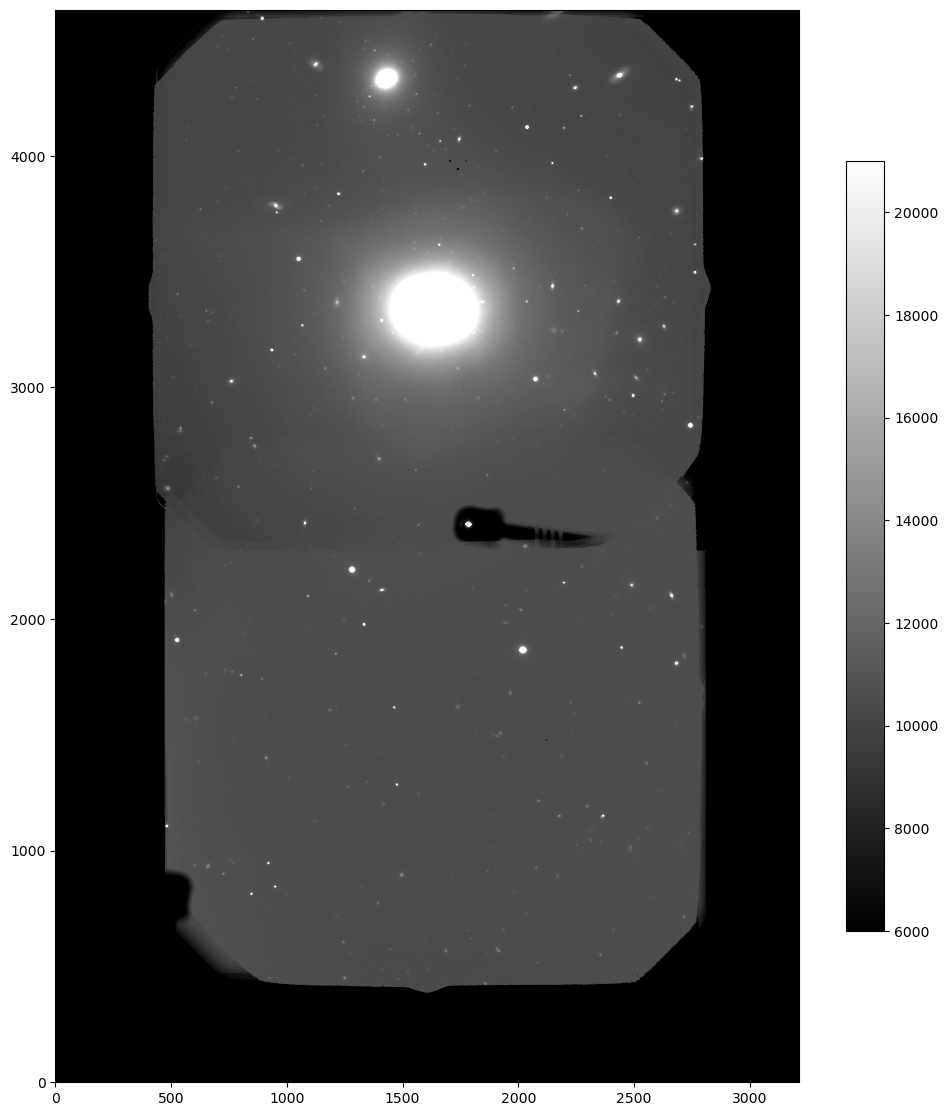

In [69]:
data = fits.open(reduce_science_i.output_filenames[0])
hdu = data[1].data

fig,ax = plt.subplots(figsize=(12,20))

plt.imshow(hdu, cmap='gray',origin='lower',vmax=21000,vmin=6000)
plt.colorbar(shrink=0.5)

In [70]:
cmd = "mv "+reduce_science_i.output_filenames[0]+" final_i.fits"
cmd2 = "mv "+reduce_science_g.output_filenames[0]+" final_g.fits"
cmd3 = "mv "+reduce_science_r.output_filenames[0]+" final_r.fits"

os.system(cmd)
os.system(cmd2)
os.system(cmd3)

0

'N20160210S0162_image.fits'